The First and very most important thing is to use the important libraries that will help us execute the code and analyze the data properly to understand the given data.

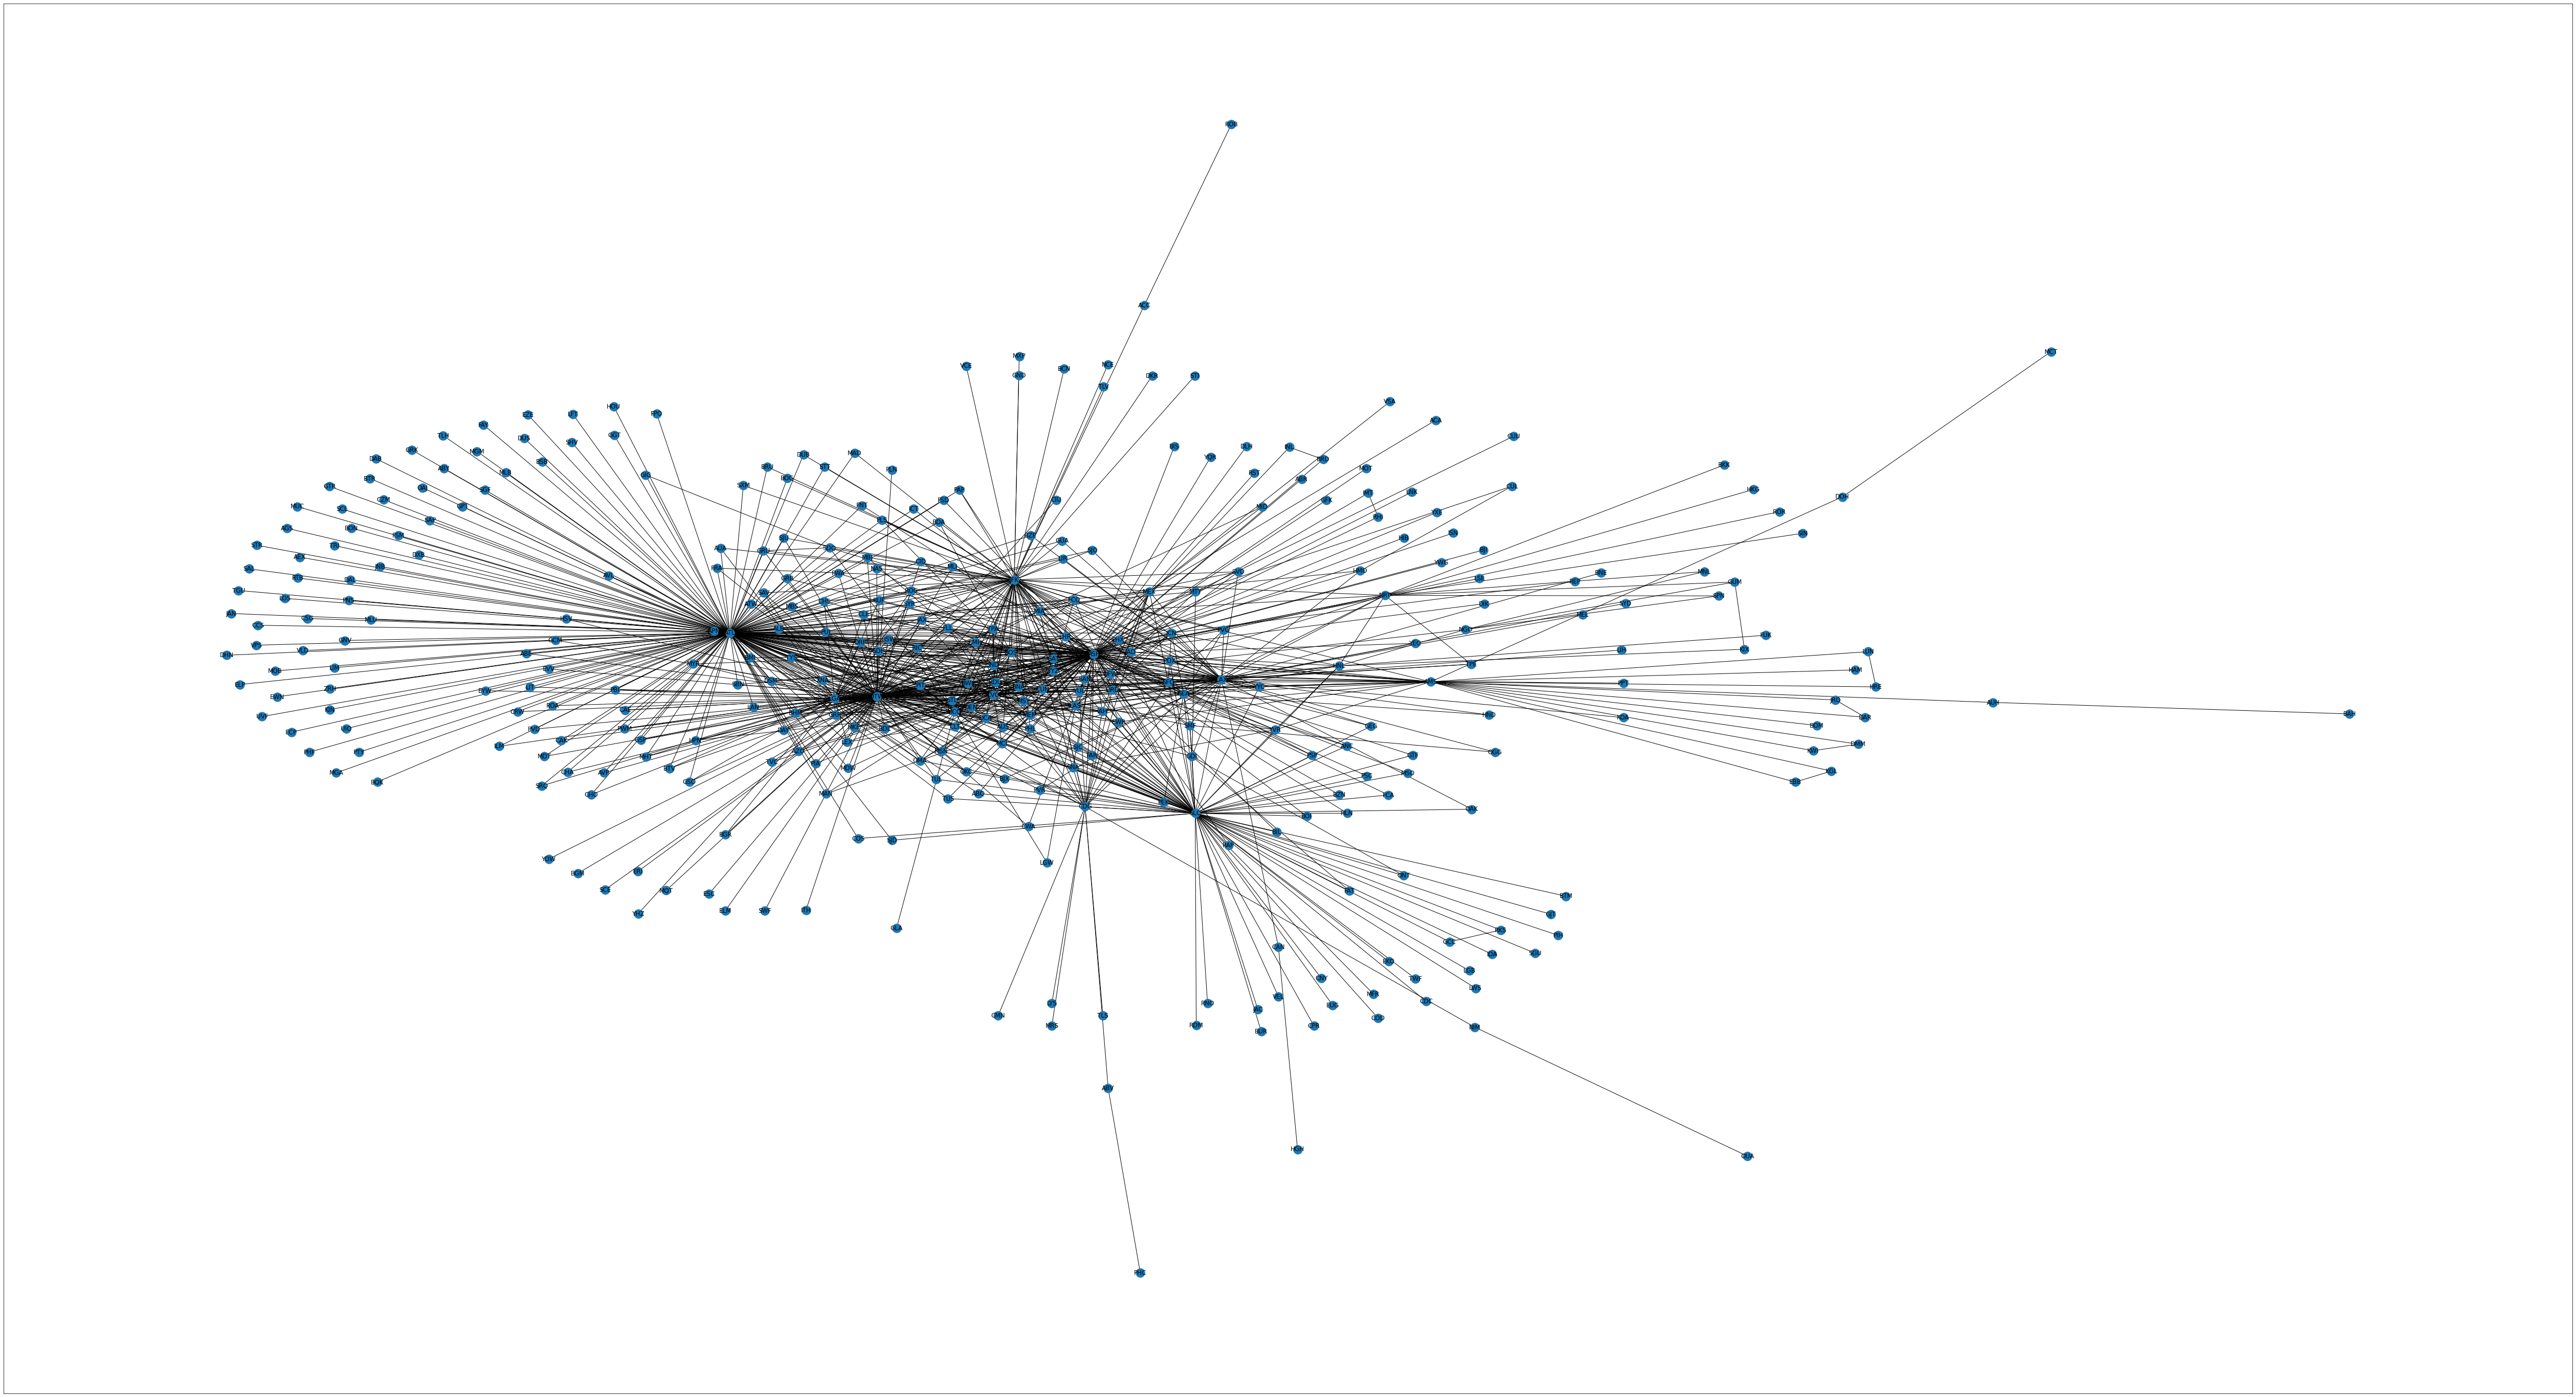

Number of nodes :  351
Number of edges :  1001
Density :  0.016296296296296295
Number of Connected components :  1
Minimum Degree:  1
Maximum Degree:  210
Average Degree:  5.703703703703703
Standard Deviation:  17.03367967839725

The top 10 hubs are: 
ABE
ATL
DTW
ABQ
MSP
SLC
ABR
ABV
CDG
PHC

The top 10 busiest airports are: 
ATL 0.3743556028034079
DTW 0.31362599507444255
MSP 0.2946069665443665
JFK 0.23476467514290308
SLC 0.19998859134450123
LGA 0.1796435370050962
CVG 0.175522266060467
LAX 0.17423827919880502
MCO 0.1478478071228931
BOS 0.126128645897513

The top 10 best connecting airports are: 
ATL 0.48640283374923987
MSP 0.1908947211599932
DTW 0.16595468515713038
SLC 0.16372434870070984
JFK 0.09629949774511207
LAX 0.08060336672089202
AMS 0.0793588053973216
CDG 0.04598581322955923
NRT 0.03922356584764974
LGA 0.017573354845734586

The next potential hubs could be: 
JFK
LGA
LAX


In [22]:
import numpy as np
import pandas as pd
import csv
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import statistics as stat


#importing the file from directory to colab.
routes1 = pd.read_csv('routes_v3.txt')
#giving proper header names to avoid confussion.
col_names = ['Airline','Airline Unique Id','Source Airport','Source Airport ID','Destination Airport',
             'Destination Airport ID','CodeShare','Number of Stops','Equipment'] 
#Giving the routes dataframe the column name as above.
routes1.columns=col_names

#Finding the AL3 Airlines
df_new = routes1[routes1['Airline'] == 'AL3']  
#print(df_new) Uncomment this line if you want to cross check the airlines output.
#Converting the dataframe to csv file with header column
df_new.to_csv('Required_Airlines.csv',header = col_names)
#Reading the csv file for the Required airlines
df = pd.read_csv('Required_Airlines.csv')
airline_graph = nx.from_pandas_edgelist(df,source="Source Airport",target="Destination Airport")
type(airline_graph)
#Removing the outlier node
airline_graph.remove_node('BTS')
airline_graph.remove_node('KSC')
airline_graph.remove_node('PRG')

#Plotting the network Figure
plt.figure(figsize=(90,50))
nx.draw_networkx(airline_graph,with_labels=True)
plt.show()


#Finding out the basic characteristics of the Graph.
g_nodes = nx.number_of_nodes(airline_graph)
g_edges = nx.number_of_edges(airline_graph)
g_density = nx.density(airline_graph)
g_number_of_connected_components = nx.number_connected_components(airline_graph)
g_connected_components = nx.connected_components(airline_graph)
degrees = [v for k, v in airline_graph.degree()]
minimum = min(degrees)
maximum = max(degrees)
avg = stat.mean(degrees)
stdev = stat.stdev(degrees)
#Printing the basics of graph
print("Number of nodes : ",g_nodes)
print("Number of edges : ",g_edges)
print("Density : ",g_density)
print("Number of Connected components : ",g_number_of_connected_components)
print("Minimum Degree: ",minimum)
print("Maximum Degree: ",maximum)
print("Average Degree: ",avg)
print("Standard Deviation: ",stdev)

#Printing the top 10 hubs in this network.
hubs_dict = nx.degree_centrality(airline_graph)
top10hubs = {k: hubs_dict[k] for k in list(hubs_dict)[:10]}
print("\nThe top 10 hubs are: ")
for i in top10hubs:
  print(i)

#finding the most busiest hubs
busy = []
most_busiest = nx.eigenvector_centrality(airline_graph)
j = 0
print("\nThe top 10 busiest airports are: ")
for w in sorted(most_busiest, key=most_busiest.get, reverse=True):
  if(j < 10):
    j+=1
    busy.append(w)
    print(w, most_busiest[w])

#Finding the best connecting hubs
best_con = []
best_connector = nx.betweenness_centrality(airline_graph)
k=0
print("\nThe top 10 best connecting airports are: ")
for w in sorted(best_connector, key=best_connector.get, reverse=True):
  if(k<10):
    best_con.append(w)
    k+=1
    print(w, best_connector[w])

# Printing the next potential hubs for the airlines
# If the airports are not the hubs, but they do exist in most busiest and most important ports.
print("\nThe next potential hubs could be: ")
for i in busy:
  if i in best_con:
    if i not in top10hubs:
      print(i)